# 12.

## Implement Linear Regression problem. For example, based on a dataset comprising of existing set of prices and area/size of the houses, predict the estimated price of a given house.

In [1]:
#Required imports
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
# Reading csv file to dataframe
df = pd.read_csv('houseprices.csv')
df.head()

,area,price
0,2600,550000
1,2800,556000
2,3000,565000
3,3200,610000
4,3400,640000


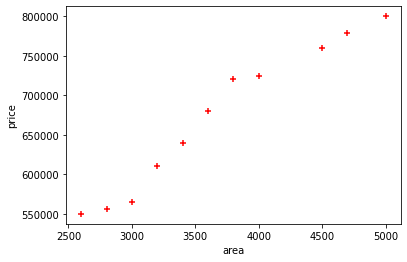

In [3]:
# Scatter plot for the dataset
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

### Preparing data for training

In [4]:
x_df = df.drop('price',axis='columns')
x_df.head()

,area
0,2600
1,2800
2,3000
3,3200
4,3400


In [5]:
price = df.price
price

0     550000
1     556000
2     565000
3     610000
4     640000
5     680000
6     720000
7     725000
8     760000
9     779000
10    800000
Name: price, dtype: int64

### Applying Linear Regression

In [6]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(x_df,price)

LinearRegression()

In [7]:
m = reg.coef_
c = reg.intercept_
print('Coefficient, m = ', m)
print('Intercept, c = ', c)

Coefficient, m =  [114.12402428]
Intercept, c =  250142.23764093674


### Predictions

In [8]:
ans1 = reg.predict([[3300]])
print('(1) Price of a house with area = 3300 sqr ft: ', ans1)

(1) Price of a house with area = 3300 sqr ft:  [626751.51777971]


In [9]:
y = m*3300 + c
print('y = m*x + c =', y)

y = m*x + c = [626751.51777971]


Here, we can see that `y = ans1 = 626751.51777971`

### Another prediction

In [10]:
ans2 = reg.predict([[6000]])
print('(2) Price of a house with area = 6000 sqr ft: ', ans2)

(2) Price of a house with area = 6000 sqr ft:  [934886.38334779]


In [11]:
y = m*6000 + c
print('y = m*x + c =', y)

y = m*x + c = [934886.38334779]


### Visualising Best Fit Line

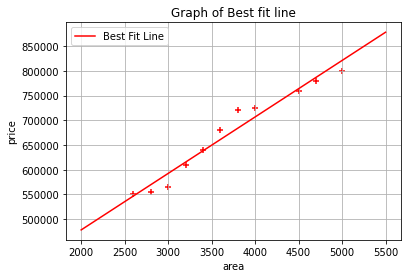

In [12]:
x = np.linspace(2000,5500)
y = m*x+c
plt.plot(x, y, '-r', label='Best Fit Line')
plt.legend(loc='upper left')
plt.title('Graph of Best fit line')
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.grid()
plt.show()

# 13.

## Based on multiple features/variables perform Linear Regression. For example, based on a number of additional features like number of bedrooms, servant room, number of balconies, number of houses of years a house has been built – predict the price of a house.

In [13]:
#Required imports
import pandas as pd
import numpy as np
from sklearn import linear_model

In [14]:
# Reading csv file to dataframe
df = pd.read_csv('houseprices2.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


### Data Preprocessing: Fill NA values with median value of a column

In [15]:
df.bedrooms.median()

4.0

In [16]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


### Applying Linear Regression

In [17]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'), df.price)

LinearRegression()

In [18]:
m1, m2, m3 = reg.coef_
c = reg.intercept_
print('Coefficients, \
\n\tm1 = {}, \
\n\tm2 = {}, \
\n\tm3 = {}'.format(m1, m2, m3))
print('Intercept, c = ', c)

Coefficients, 
	m1 = 112.06244194213456, 
	m2 = 23388.880077939153, 
	m3 = -3231.717908632967
Intercept, c =  221323.00186540443


### Predictions

In [19]:
ans1 = reg.predict([[3000, 3, 40]])
print('(1) Price of home with 3000 sqr ft area, 3 bedrooms, 40 year old: ', ans1)

(1) Price of home with 3000 sqr ft area, 3 bedrooms, 40 year old:  [498408.25158031]


In [20]:
 y1 = m1*3000 + m2*3 + m3*40 + c
print('\ty1 = m1*x1 + m2*x2 + m3*x3 + c =\n\t', y1)

	y1 = m1*x1 + m2*x2 + m3*x3 + c =
	 498408.2515803069


In [21]:
reg.predict([[2500, 5, 10]])
print('(2) Price of home with 2500 sqr ft area, 5 bedrooms, 10 year old: ', ans2)

(2) Price of home with 2500 sqr ft area, 5 bedrooms, 10 year old:  [934886.38334779]


In [22]:
 y1 = m1*2500 + m2*5 + m3*10 + c
print('\ty1 = m1*x1 + m2*x2 + m3*x3 + c =\n\t', y1)

	y1 = m1*x1 + m2*x2 + m3*x3 + c =
	 586106.3280241069


# 14.

## Implement a classification/ logistic regression problem. For example based on different features of students data, classify, whether a student is suitable for a particular activity. Based on the available dataset, a student can also implement another classification problem like checking whether an email is spam or not.

In [23]:
# Import and load digits dataset
from sklearn.datasets import load_digits
digits = load_digits()

# Import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

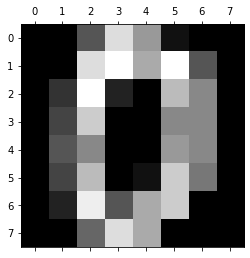

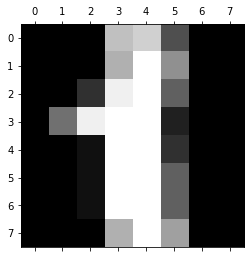

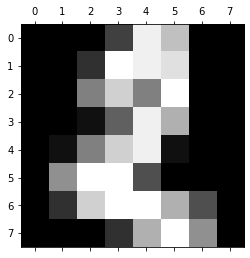

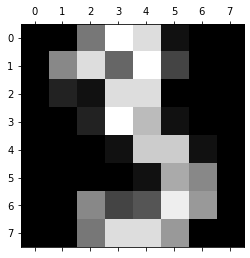

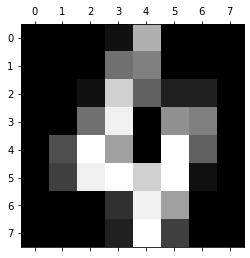

In [24]:
# Plot 2D matrix data of digits
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [25]:
# Get the attributes/columns of digits dataset
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

### Creating and training the logistic regression model

In [26]:
# Import the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=3000)

In [27]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [28]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

1437 360 1437 360


In [29]:
# Training the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

### Measuring accuracy of our model

In [30]:
model.score(X_test, y_test)

0.9611111111111111

### Predictions

In [31]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [32]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 1, 1, 4, 3, 4, 6, 8, 6, 2, 1, 6, 8, 6, 7, 2, 7, 2, 1, 3, 5, 4,
       3, 9, 4, 9, 6, 7, 7, 7, 1, 6, 8, 5, 6, 4, 4, 1, 4, 4, 4, 2, 9, 3,
       6, 9, 1, 7, 8, 3, 6, 9, 8, 0, 9, 1, 2, 7, 8, 9, 8, 8, 9, 1, 3, 8,
       8, 5, 7, 6, 3, 6, 7, 4, 6, 7, 6, 6, 8, 8, 0, 5, 4, 9, 7, 9, 0, 1,
       8, 7, 2, 1, 6, 3, 8, 0, 2, 1, 1, 5, 0, 0, 7, 3, 5, 1, 5, 6, 0, 5,
       5, 5, 2, 0, 0, 7, 3, 0, 7, 4, 5, 9, 0, 6, 5, 9, 1, 7, 8, 9, 3, 8,
       4, 3, 9, 0, 0, 0, 9, 0, 4, 0, 7, 5, 3, 0, 7, 1, 1, 9, 3, 0, 5, 5,
       3, 7, 6, 8, 7, 9, 8, 7, 6, 5, 9, 4, 8, 2, 6, 2, 9, 3, 0, 4, 6, 9,
       9, 1, 2, 0, 2, 0, 1, 4, 0, 4, 1, 6, 1, 3, 5, 1, 9, 0, 3, 3, 9, 2,
       0, 1, 2, 5, 1, 4, 9, 9, 2, 7, 2, 6, 0, 9, 0, 4, 4, 3, 7, 4, 5, 0,
       4, 4, 7, 0, 9, 3, 1, 4, 3, 6, 5, 7, 2, 3, 5, 7, 2, 9, 7, 4, 2, 1,
       1, 6, 4, 3, 8, 6, 1, 8, 2, 5, 8, 7, 5, 5, 0, 5, 8, 9, 7, 3, 6, 0,
       8, 1, 3, 5, 7, 0, 8, 7, 9, 1, 3, 9, 9, 5, 3, 9, 2, 1, 7, 9, 5, 6,
       3, 3, 0, 7, 9, 5, 8, 4, 5, 8, 1, 8, 1, 9, 4,

### Confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 0,  1, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 36,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 38,  0,  2],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 42]], dtype=int64)

Text(69.0, 0.5, 'Truth')

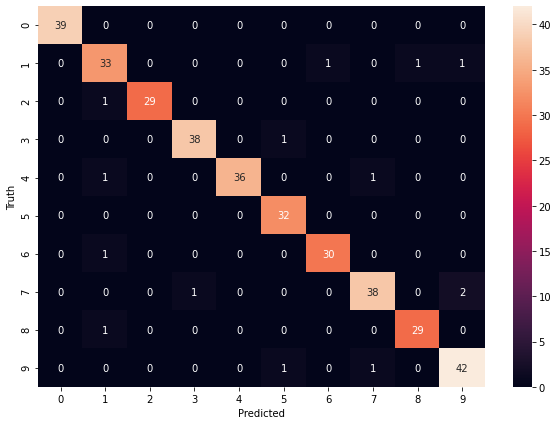

In [34]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')